## 一周搞定AI毕设 深度学习医学图像分类教程目录结构

## 第1章：COLAB环境介绍
### 1.1 Google Colab简介
### 1.2 环境配置
### 1.3 基础操作

## 第2章：数据集准备Dataset & DataLoader
### 2.1 数据集介绍
### 2.2 数据预处理
### 2.3 Dataset类构建
### 2.4 DataLoader配置
### 2.5 数据可视化

## 第3章：第一个图像分类模型
### 3.1 卷积神经网络基础
### 3.2 简单CNN模型构建
### 3.3 损失函数和优化器
### 3.4 训练循环实现
### 3.5 训练过程监控

## 第4章：迁移学习图像分类
### 4.1 迁移学习理论
### 4.2 预训练模型选择
### 4.3 模型微调实现
### 4.4 高级微调技术
### 4.5 性能对比分析

## 第5章：测试集评估、分类报告、混淆矩阵
### 5.1 模型评估指标
### 5.2 分类报告生成
### 5.3 混淆矩阵分析
### 5.4 错误案例分析
### 5.5 模型诊断

## 第6章：Gradio界面构建和摄像头识别
### 6.1 Gradio框架介绍
### 6.2 模型推理函数
### 6.3 图像上传界面
### 6.4 摄像头实时识别
### 6.5 界面美化和部署

## 第7章：图像分类语义降维可视化
### 7.1 特征提取
### 7.2 降维算法原理
### 7.3 可视化实现
### 7.4 聚类分析
### 7.5 结果解释

## 第8章：图像分类可解释性分析CAM
### 8.1 可解释性AI概述
### 8.2 CAM方法原理
### 8.3 Grad-CAM实现
### 8.4 高级CAM变体
### 8.5 可解释性应用

## 第9章：图像分类部署ONNX模型推理
### 9.1 模型部署概述
### 9.2 ONNX模型转换
### 9.3 推理引擎优化
### 9.4 部署方案设计
### 9.5 性能基准测试

## 第10章：Gemini API图像识别（附录）
### 10.1 Gemini API介绍
### 10.2 API集成实现
### 10.3 图像识别应用
### 10.4 性能对比

## 从kaggle下载数据

In [1]:
# !kaggle datasets download -d adityamahimkar/iqothnccd-lung-cancer-dataset
!curl -L -o iqothnccd-lung-cancer-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/adityamahimkar/iqothnccd-lung-cancer-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  198M  100  198M    0     0  24.1M      0  0:00:08  0:00:08 --:--:-- 30.7M


In [ ]:
#!/bin/bash
# curl -L -o ~/Downloads/iqothnccd-lung-cancer-dataset.zip\
#   https://www.kaggle.com/api/v1/datasets/download/adityamahimkar/iqothnccd-lung-cancer-dataset

In [2]:
!unzip /content/iqothnccd-lung-cancer-dataset.zip

Archive:  /content/iqothnccd-lung-cancer-dataset.zip
  inflating: Test cases/000001_03_01_088.png  
  inflating: Test cases/000017_02_01_016.png  
  inflating: Test cases/000019_01_01_021.png  
  inflating: Test cases/000019_02_01_025.png  
  inflating: Test cases/000019_03_01_025.png  
  inflating: Test cases/000020_01_01_066.png  
  inflating: Test cases/000020_02_01_062.png  
  inflating: Test cases/000020_03_01_134.png  
  inflating: Test cases/000020_03_01_166.png  
  inflating: Test cases/000020_03_01_212.png  
  inflating: Test cases/000020_04_01_116.png  
  inflating: Test cases/000020_04_01_143.png  
  inflating: Test cases/000020_04_01_159.png  
  inflating: Test cases/000021_01_01_016.png  
  inflating: Test cases/000021_02_01_068.png  
  inflating: Test cases/000021_03_01_012.png  
  inflating: Test cases/000021_03_01_017.png  
  inflating: Test cases/000021_04_01_090.png  
  inflating: Test cases/000027_01_01_113.png  
  inflating: Test cases/000027_02_01_105.png  
  infla

## 设置中文字体

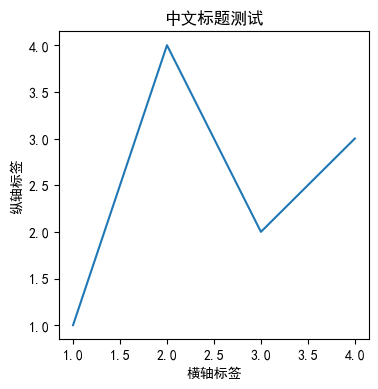

In [3]:
import matplotlib.pyplot as plt
import urllib.request
from matplotlib.font_manager import FontProperties

# 下载字体（只需运行一次）
urllib.request.urlretrieve('https://github.com/StellarCN/scp_zh/raw/master/fonts/SimHei.ttf', 'SimHei.ttf')

# 全局设置字体
plt.rcParams['font.family'] = ['SimHei']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 手动添加字体到matplotlib
import matplotlib.font_manager as fm
fm.fontManager.addfont('SimHei.ttf')

plt.figure(figsize=(4, 4))
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])
plt.title('中文标题测试')
plt.xlabel('横轴标签')
plt.ylabel('纵轴标签')
plt.show()

## 1.导入必要的库

In [4]:
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import Counter
import seaborn as sns

# 设置随机种子，确保结果可重现
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

print("所有库导入成功！")
print(f"PyTorch版本: {torch.__version__}")

所有库导入成功！
PyTorch版本: 2.8.0+cu126


## 2.1 图像分类数据集介绍

### 2.1.1 数据集特点分析

In [5]:
# 设置数据集路径（请根据实际情况修改）
data_root = "/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset"  # 替换为你的数据集文件夹路径

def analyze_dataset(data_path):
    """
    分析数据集的基本信息
    """
    if not os.path.exists(data_path):
        print(f"数据集路径不存在: {data_path}")
        return None

    # 获取所有子文件夹（类别）
    categories = []
    for item in os.listdir(data_path):
        item_path = os.path.join(data_path, item)
        if os.path.isdir(item_path):
            categories.append(item)

    print("=== 数据集基本信息 ===")
    print(f"数据集路径: {data_path}")
    print(f"类别数量: {len(categories)}")
    print(f"类别名称: {categories}")

    return categories

# 分析数据集（如果路径存在）
categories = analyze_dataset(data_root)

=== 数据集基本信息 ===
数据集路径: /content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset
类别数量: 3
类别名称: ['Malignant cases', 'Normal cases', 'Bengin cases']


### 2.1.2 类别分布统计

In [6]:
def count_images_per_class(data_path, categories):
    """
    统计每个类别的图像数量
    """
    if categories is None:
        print("请先设置正确的数据集路径")
        return None

    class_counts = {}
    total_images = 0

    # 支持的图像格式
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif']

    for category in categories:
        category_path = os.path.join(data_path, category)
        count = 0

        # 计算该类别下的图像数量
        for file_name in os.listdir(category_path):
            file_ext = os.path.splitext(file_name)[1].lower()
            if file_ext in image_extensions:
                count += 1

        class_counts[category] = count
        total_images += count
        print(f"{category}: {count} 张图像")

    print(f"\n总图像数量: {total_images}")
    return class_counts

# 统计类别分布
if categories is not None:
    class_counts = count_images_per_class(data_root, categories)
else:
    # 模拟数据用于演示
    categories = ['cat', 'dog', 'bird']
    class_counts = {'cat': 1000, 'dog': 1200, 'bird': 800}
    print("使用模拟数据进行演示:")
    for category, count in class_counts.items():
        print(f"{category}: {count} 张图像")

Malignant cases: 561 张图像
Normal cases: 416 张图像
Bengin cases: 120 张图像

总图像数量: 1097


## 2.2 数据预处理

### 2.2.1 图像读取和格式统一

图像路径: /content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (1).jpg
图像模式: RGB
图像尺寸: (512, 512)
图像格式: JPEG


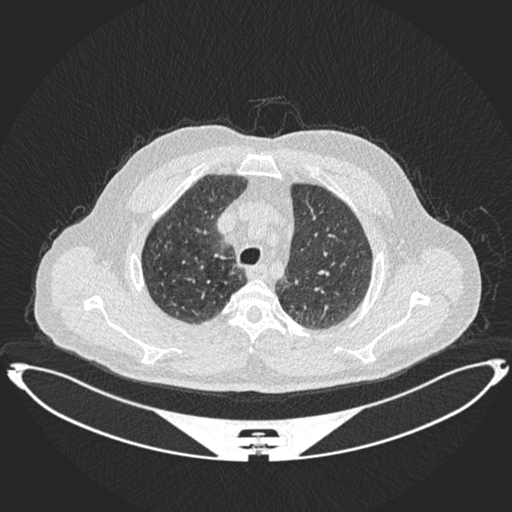

In [7]:
def load_and_show_image(image_path):
    """
    加载并显示图像的基本信息
    """
    try:
        # 使用PIL加载图像
        image = Image.open(image_path)

        print(f"图像路径: {image_path}")
        print(f"图像模式: {image.mode}")
        print(f"图像尺寸: {image.size}")
        print(f"图像格式: {image.format}")

        return image
    except Exception as e:
        print(f"加载图像失败: {e}")
        return None


load_and_show_image('/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (1).jpg')

### 2.2.2 图像尺寸标准化

In [8]:
# 定义标准图像尺寸
IMG_SIZE = (224, 224)  # 常用的ImageNet尺寸

# 基本的图像变换
basic_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),              # 调整尺寸
    transforms.ToTensor(),                    # 转换为张量
    transforms.Normalize(                     # 标准化
        mean=[0.485, 0.456, 0.406],          # ImageNet的均值
        std=[0.229, 0.224, 0.225]            # ImageNet的标准差
    )
])

print("=== 基本图像变换 ===")
print("1. 图像尺寸调整为:", IMG_SIZE)
print("2. 转换为PyTorch张量")
print("3. 使用ImageNet统计值进行标准化")

=== 基本图像变换 ===
1. 图像尺寸调整为: (224, 224)
2. 转换为PyTorch张量
3. 使用ImageNet统计值进行标准化


### 2.2.3 数据增强技术

In [9]:
# 训练时的数据增强
train_transform = transforms.Compose([
    # 尺寸变换
    transforms.Resize((256, 256)),            # 先放大一点
    transforms.RandomCrop(IMG_SIZE),          # 随机裁剪

    # 几何变换
    transforms.RandomHorizontalFlip(p=0.5),   # 随机水平翻转
    transforms.RandomRotation(degrees=10),    # 随机旋转(-10到10度)

    # 颜色变换
    transforms.ColorJitter(                   # 颜色抖动
        brightness=0.2,                       # 亮度变化
        contrast=0.2,                         # 对比度变化
        saturation=0.2,                       # 饱和度变化
        hue=0.1                               # 色调变化
    ),

    # 最终处理
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# 测试时的变换（不进行数据增强）
test_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

print("=== 数据增强技术 ===")
print("训练时增强包括：")
print("- 随机裁剪")
print("- 随机水平翻转")
print("- 随机旋转")
print("- 颜色抖动（亮度、对比度、饱和度、色调）")

=== 数据增强技术 ===
训练时增强包括：
- 随机裁剪
- 随机水平翻转
- 随机旋转
- 颜色抖动（亮度、对比度、饱和度、色调）


## 2.3 Dataset类构建

### 2.3.1 自定义Dataset类设计

In [10]:
class ImageClassificationDataset(Dataset):
    """
    图像分类数据集类
    """

    def __init__(self, data_path, transform=None, is_train=True):
        """
        初始化数据集

        Args:
            data_path: 数据集根目录路径
            transform: 图像变换
            is_train: 是否为训练集
        """
        self.data_path = data_path
        self.transform = transform
        self.is_train = is_train

        # 支持的图像格式
        self.image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']

        # 获取所有图像路径和标签
        self.image_paths = []
        self.labels = []
        self.class_to_idx = {}
        self.idx_to_class = {}

        self._load_dataset()

    def _load_dataset(self):
        """
        加载数据集，获取图像路径和标签
        """
        if not os.path.exists(self.data_path):
            print(f"数据集路径不存在: {self.data_path}")
            return

        # 获取类别文件夹
        class_names = []
        for item in os.listdir(self.data_path):
            item_path = os.path.join(self.data_path, item)
            if os.path.isdir(item_path):
                class_names.append(item)

        class_names.sort()  # 排序确保一致性

        # 建立类别映射
        for idx, class_name in enumerate(class_names):
            self.class_to_idx[class_name] = idx
            self.idx_to_class[idx] = class_name

        # 遍历每个类别文件夹
        for class_name in class_names:
            class_path = os.path.join(self.data_path, class_name)
            class_idx = self.class_to_idx[class_name]

            # 获取该类别下的所有图像
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                file_ext = os.path.splitext(file_name)[1].lower()

                # 检查是否为支持的图像格式
                if file_ext in self.image_extensions and os.path.isfile(file_path):
                    self.image_paths.append(file_path)
                    self.labels.append(class_idx)

        print(f"成功加载数据集:")
        print(f"- 类别数: {len(self.class_to_idx)}")
        print(f"- 图像总数: {len(self.image_paths)}")
        print(f"- 类别映射: {self.class_to_idx}")

    def __len__(self):
        """
        返回数据集大小
        """
        return len(self.image_paths)

    def __getitem__(self, idx):
        """
        获取单个样本

        Args:
            idx: 样本索引

        Returns:
            image: 处理后的图像张量
            label: 标签
        """
        # 获取图像路径和标签
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        try:
            # 加载图像
            image = Image.open(image_path)

            # 确保图像为RGB模式
            if image.mode != 'RGB':
                image = image.convert('RGB')

            # 应用变换
            if self.transform:
                image = self.transform(image)

            return image, label

        except Exception as e:
            print(f"加载图像失败 {image_path}: {e}")
            # 返回一个默认图像和标签
            default_image = Image.new('RGB', IMG_SIZE, color='white')
            if self.transform:
                default_image = self.transform(default_image)
            return default_image, label

    def get_class_names(self):
        """
        返回类别名称列表
        """
        return [self.idx_to_class[i] for i in range(len(self.idx_to_class))]

print("=== 自定义Dataset类 ===")
print("ImageClassificationDataset类包含以下功能：")
print("- 自动扫描文件夹结构")
print("- 建立类别到索引的映射")
print("- 支持多种图像格式")
print("- 异常处理机制")

=== 自定义Dataset类 ===
ImageClassificationDataset类包含以下功能：
- 自动扫描文件夹结构
- 建立类别到索引的映射
- 支持多种图像格式
- 异常处理机制


### 2.3.2 创建数据集实例

In [11]:

image_dataset = ImageClassificationDataset(
    data_path=data_root,
    transform=train_transform,
    is_train=True
)


成功加载数据集:
- 类别数: 3
- 图像总数: 1097
- 类别映射: {'Bengin cases': 0, 'Malignant cases': 1, 'Normal cases': 2}


## 2.4 DataLoader配置

### 2.4.1 DataLoader参数设置

In [13]:
# DataLoader配置参数
BATCH_SIZE = 32        # 批次大小
NUM_WORKERS = 4        # 多线程数量（根据CPU核心数调整）
SHUFFLE_TRAIN = True   # 训练时是否打乱数据
SHUFFLE_TEST = False   # 测试时不打乱数据

def create_dataloaders(train_dataset, train_split=0.8):
    """
    创建训练和测试的DataLoader

    Args:
        train_dataset: 训练数据集
        train_split: 训练集比例
    """
    if train_dataset is None:
        print("数据集为空，创建模拟DataLoader")
        return None, None, None

    # 计算训练集和验证集的大小
    total_size = len(train_dataset)
    train_size = int(train_split * total_size)
    val_size = total_size - train_size

    print(f"=== 数据集划分 ===")
    print(f"总样本数: {total_size}")
    print(f"训练集: {train_size} 样本")
    print(f"验证集: {val_size} 样本")

    # 随机划分训练集和验证集
    train_indices = list(range(total_size))
    random.shuffle(train_indices)

    train_subset_indices = train_indices[:train_size]
    val_subset_indices = train_indices[train_size:]

    # 创建子数据集
    train_subset = torch.utils.data.Subset(train_dataset, train_subset_indices)
    val_subset = torch.utils.data.Subset(train_dataset, val_subset_indices)

    # 创建DataLoader
    train_loader = DataLoader(
        train_subset,
        batch_size=BATCH_SIZE,
        shuffle=SHUFFLE_TRAIN,
        num_workers=NUM_WORKERS,
        pin_memory=True  # 加速GPU传输
    )

    val_loader = DataLoader(
        val_subset,
        batch_size=BATCH_SIZE,
        shuffle=SHUFFLE_TEST,
        num_workers=NUM_WORKERS,
        pin_memory=True
    )



    print(f"\n=== DataLoader配置 ===")
    print(f"批次大小: {BATCH_SIZE}")
    print(f"工作线程数: {NUM_WORKERS}")
    print(f"训练集批次数: {len(train_loader)}")
    print(f"验证集批次数: {len(val_loader)}")

    return train_loader, val_loader

# 创建DataLoader
train_loader, val_loader = create_dataloaders(image_dataset)

=== 数据集划分 ===
总样本数: 1097
训练集: 877 样本
验证集: 220 样本

=== DataLoader配置 ===
批次大小: 32
工作线程数: 4
训练集批次数: 28
验证集批次数: 7


## 2.5 数据可视化

### 2.5.1 样本展示函数

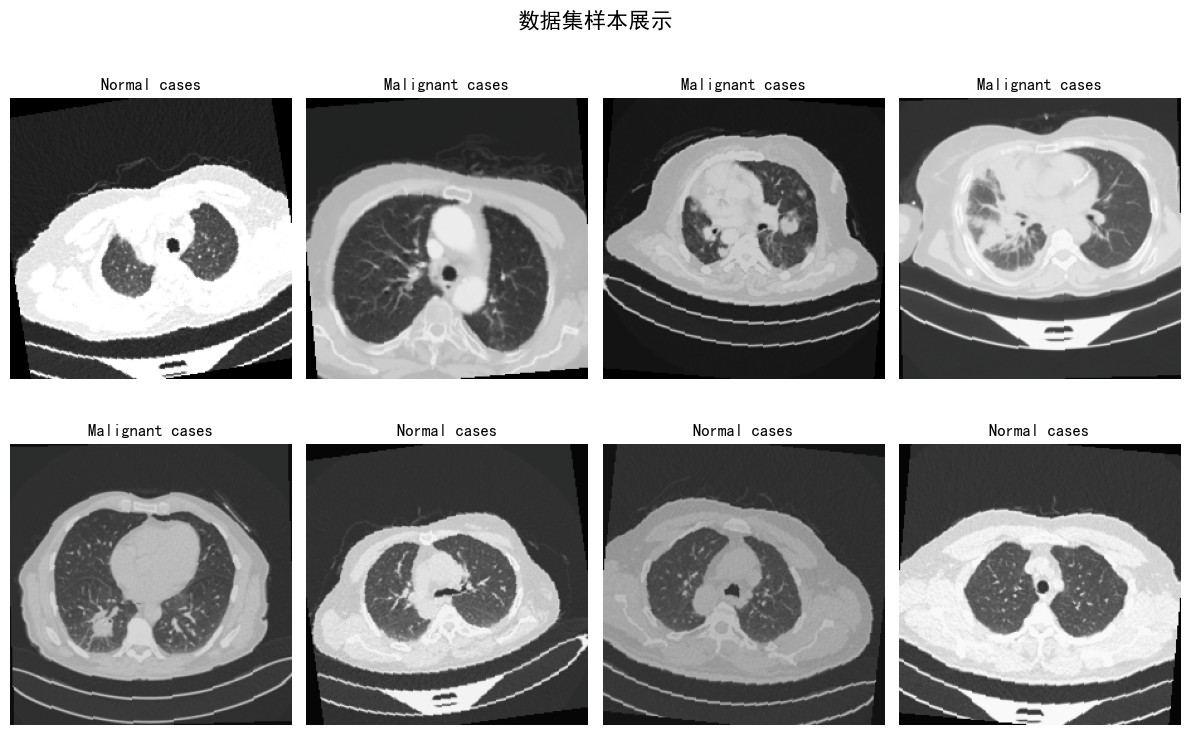

In [14]:
def show_sample_images(dataset, num_samples=8, figsize=(12, 8)):
    """
    展示数据集中的样本图像

    Args:
        dataset: 数据集对象
        num_samples: 显示的样本数量
        figsize: 图片大小
    """
    if dataset is None:
        print("数据集为空，无法展示样本")
        return

    # 随机选择样本
    indices = random.sample(range(len(dataset)), min(num_samples, len(dataset)))

    # 设置子图
    cols = 4
    rows = (num_samples + cols - 1) // cols

    plt.figure(figsize=figsize)
    plt.suptitle('数据集样本展示', fontsize=16)

    for i, idx in enumerate(indices):
        image, label = dataset[idx]

        # 反标准化图像用于显示
        if isinstance(image, torch.Tensor):
            # 反标准化
            mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
            std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
            image = image * std + mean
            image = torch.clamp(image, 0, 1)

            # 转换为numpy数组
            image = image.permute(1, 2, 0).numpy()

        plt.subplot(rows, cols, i + 1)
        plt.imshow(image)

        # 显示标签
        class_name = dataset.idx_to_class.get(label, f"Class_{label}")
        plt.title(f'{class_name}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


show_sample_images(image_dataset, num_samples=8)


### 2.5.2 类别分布可视化

=== 类别分布可视化 ===


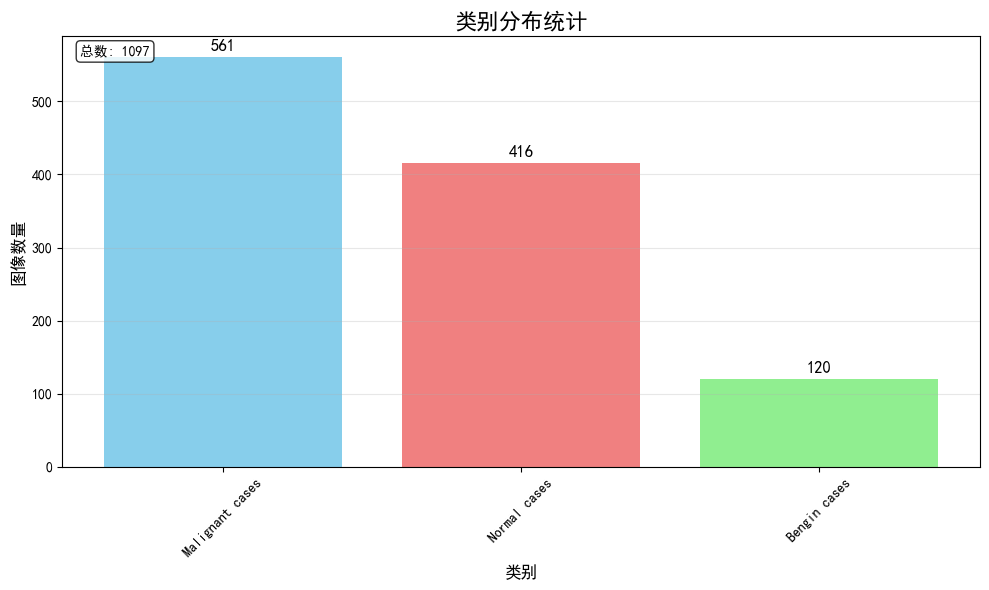

In [15]:
def plot_class_distribution(class_counts):
    """
    绘制类别分布图

    Args:
        class_counts: 类别计数字典
    """
    if class_counts is None:
        return

    plt.figure(figsize=(10, 6))

    # 创建条形图
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    bars = plt.bar(classes, counts, color=['skyblue', 'lightcoral', 'lightgreen'][:len(classes)])

    # 添加数值标签
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01,
                str(count), ha='center', va='bottom', fontsize=12)

    plt.title('类别分布统计', fontsize=16)
    plt.xlabel('类别', fontsize=12)
    plt.ylabel('图像数量', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)

    # 添加统计信息
    total = sum(counts)
    plt.text(0.02, 0.98, f'总数: {total}', transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

# 绘制类别分布
print("=== 类别分布可视化 ===")
plot_class_distribution(class_counts)

### 2.5.3 数据增强效果展示

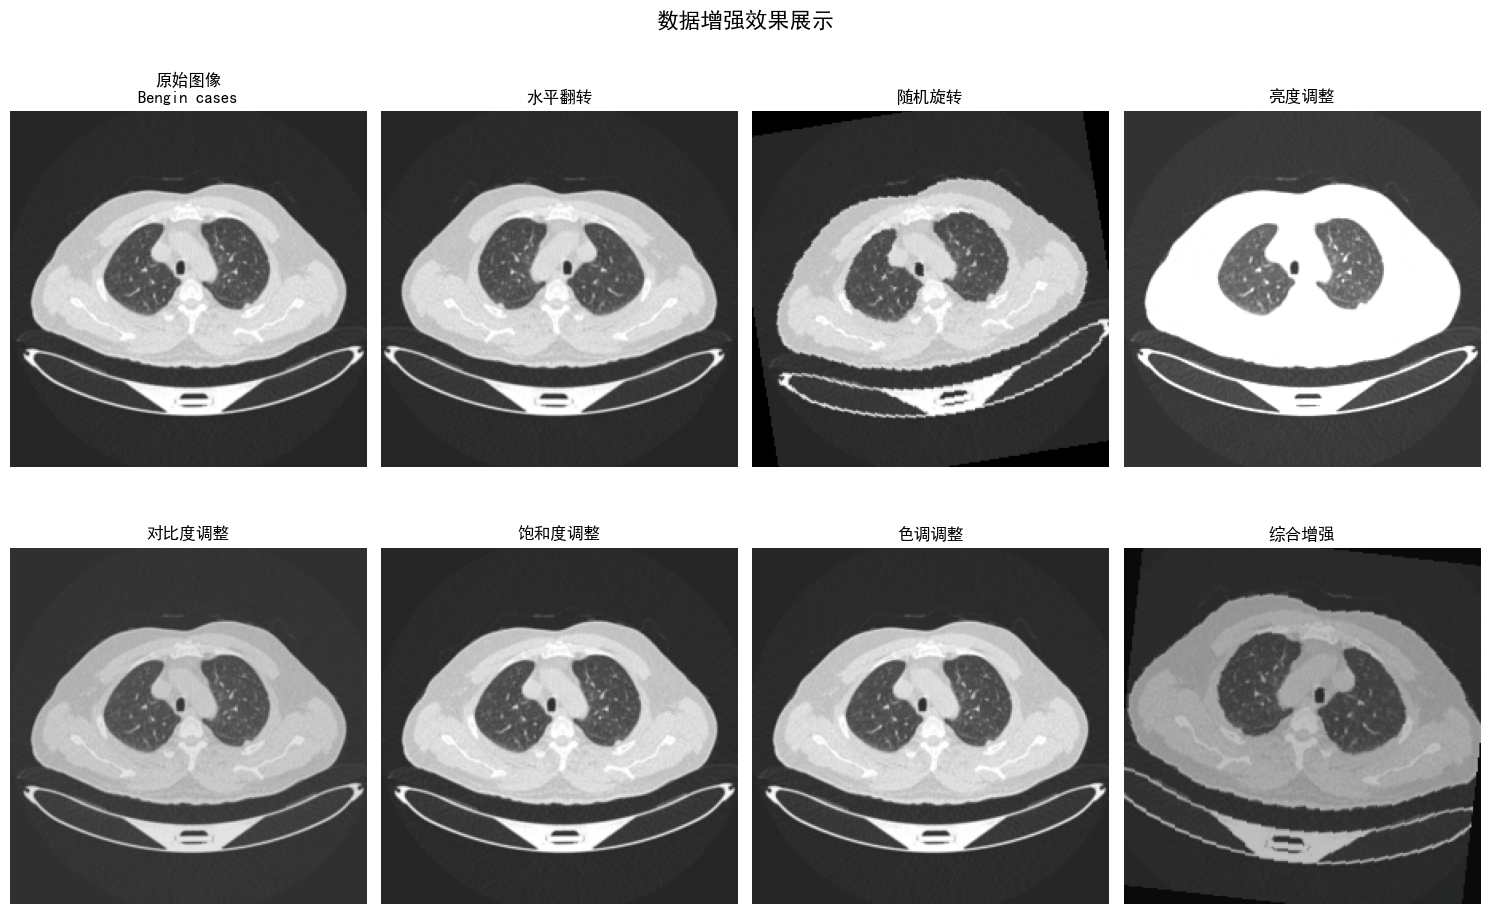

In [16]:
def show_augmentation_effects(dataset, idx=0):
    """
    展示数据增强的效果

    Args:
        dataset: 数据集对象
        idx: 样本索引
    """
    if dataset is None:
        print("数据集为空，无法展示数据增强效果")
        return

    # 获取原始图像（不应用增强）
    original_transform = transforms.Compose([
        transforms.Resize(IMG_SIZE),
        transforms.ToTensor()
    ])

    # 临时修改数据集的transform
    original_dataset_transform = dataset.transform

    plt.figure(figsize=(15, 10))
    plt.suptitle('数据增强效果展示', fontsize=16)

    # 显示原始图像
    dataset.transform = original_transform
    original_image, label = dataset[idx]
    class_name = dataset.idx_to_class.get(label, f"Class_{label}")

    plt.subplot(2, 4, 1)
    plt.imshow(original_image.permute(1, 2, 0))
    plt.title(f'原始图像\n{class_name}')
    plt.axis('off')

    # 应用不同的增强效果
    augmentations = [
        ("水平翻转", transforms.Compose([
            transforms.Resize(IMG_SIZE),
            transforms.RandomHorizontalFlip(p=1.0),
            transforms.ToTensor()
        ])),
        ("随机旋转", transforms.Compose([
            transforms.Resize(IMG_SIZE),
            transforms.RandomRotation(degrees=30),
            transforms.ToTensor()
        ])),
        ("亮度调整", transforms.Compose([
            transforms.Resize(IMG_SIZE),
            transforms.ColorJitter(brightness=0.5),
            transforms.ToTensor()
        ])),
        ("对比度调整", transforms.Compose([
            transforms.Resize(IMG_SIZE),
            transforms.ColorJitter(contrast=0.5),
            transforms.ToTensor()
        ])),
        ("饱和度调整", transforms.Compose([
            transforms.Resize(IMG_SIZE),
            transforms.ColorJitter(saturation=0.5),
            transforms.ToTensor()
        ])),
        ("色调调整", transforms.Compose([
            transforms.Resize(IMG_SIZE),
            transforms.ColorJitter(hue=0.3),
            transforms.ToTensor()
        ])),
        ("综合增强", train_transform)
    ]

    for i, (aug_name, aug_transform) in enumerate(augmentations, 2):
        dataset.transform = aug_transform
        aug_image, _ = dataset[idx]

        # 如果是标准化的图像，需要反标准化
        if aug_name == "综合增强":
            mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
            std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
            aug_image = aug_image * std + mean
            aug_image = torch.clamp(aug_image, 0, 1)

        plt.subplot(2, 4, i)
        plt.imshow(aug_image.permute(1, 2, 0))
        plt.title(aug_name)
        plt.axis('off')

    # 恢复原始transform
    dataset.transform = original_dataset_transform

    plt.tight_layout()
    plt.show()


show_augmentation_effects(image_dataset, idx=0)


## 6. 总结

In [ ]:
print("=== 数据预处理完成总结 ===")
print("""
本教程完成了以下内容：

1. 数据集分析：
   - 自动识别类别文件夹
   - 统计各类别的图像数量
   - 分析数据集基本特征

2. 数据预处理：
   - 图像尺寸标准化
   - 数据格式统一
   - ImageNet标准化

3. 数据增强：
   - 几何变换：翻转、旋转、裁剪
   - 颜色变换：亮度、对比度、饱和度、色调调整

4. 自定义Dataset类：
   - 实现__init__、__len__、__getitem__方法
   - 自动建立类别映射
   - 异常处理机制

5. DataLoader配置：
   - 批次处理
   - 多线程加载
   - 训练/验证集划分

6. 数据可视化：
   - 样本图像展示
   - 类别分布统计
   - 数据增强效果对比

下一步可以：
- 构建深度学习模型
- 定义损失函数和优化器
- 开始模型训练
""")



## 3.后续数据处理扩展的5个重要方向
1. 数据质量检测与清洗

核心功能：自动检测损坏图像、重复图像、异常尺寸等问题，并提供清洗建议。

实现价值：确保训练数据质量，避免脏数据影响模型性能，提高数据集的可靠性。

2. 智能数据增强策略

核心功能：实现AutoAugment、RandAugment等自适应增强策略，根据数据集特点自动选择最优增强组合。

实现价值：相比固定增强策略，能显著提升模型泛化能力，减少过拟合风险。

3. 类别不平衡处理

核心功能：实现加权采样、SMOTE过采样、焦点损失等技术来处理类别分布不均的问题。

实现价值：解决现实场景中常见的长尾分布问题，确保少数类也能被有效学习。

4. 在线数据增强与缓存

核心功能：实现GPU端数据增强和智能缓存机制，减少CPU-GPU数据传输开销。

实现价值：大幅提升训练效率，特别是在大数据集上能节省30-50%的训练时间。

5. 数据版本管理与监控

核心功能：记录数据集变更历史、统计训练过程中的数据分布变化，提供数据血缘追踪。

实现价值：支持实验复现和模型调试，帮助定位性能波动的数据原因，提升开发效率。

## 账号

小红书账号：阿钟AI论文辅导

b站账号：阿钟AI算法

企鹅：2084339727